### Building a 3D dataset

In [27]:
import numpy as np
np.random.seed(4)
w1, w2 =0.1,0.3
noise=0.1
m =60

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m,3))
X[:,0] = np.cos(angles) + np.sin(angles)/2 +noise * np.random.randn(m)/2
X[:,1] = np.sin(angles) * 0.7 + noise * np.random.randn(m)/2
X[:,2] = X[:,0] * w1 +X[:,1] * w2 + noise * np.random.randn(m)


### PCA using SVD decomposition

In [28]:
# dont't understand this much

X_centered = X - X.mean(axis=0)
# dataset should be centered around origin

U, s, Vt = np.linalg.svd(X_centered)
# single value decomposition
# any matrix can be decomposed into
# a rotation matrix
# a scaling and projecting matrix
# and another rotation matrix

# S is the matrix formed by diagnol elements

c1 = Vt.T[:,0]
c2 = Vt.T[:,1]


In [29]:
print(s)
print(Vt)
print(c2)

[6.77645005 2.82403671 0.78116597]
[[ 0.93636116  0.29854881  0.18465208]
 [-0.34027485  0.90119108  0.2684542 ]
 [-0.08626012 -0.31420255  0.94542898]]
[-0.34027485  0.90119108  0.2684542 ]


In [30]:
print(X_centered.shape)
print(X.shape)

(60, 3)
(60, 3)


In [31]:
m, n = X.shape
S = np.zeros(X_centered.shape)
# this is done so that the diagnol array S can be used for dot operation

S[:n, :n] = np.diag(s)

In [32]:
np.allclose(X_centered, U.dot(S).dot(Vt))

# to find if two arrays are equivalent 
# within a tolerance

True

In [33]:
# projection onto 
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)

In [34]:
# 3xperiment
print(Vt.T[:,:2])
print(Vt.T[:,:])

# we are only considering first two arrays
# we are disregarding the thrid set of coordinates

arra = np.array([[1,1,1,1],[2,2,2,2],[3,3,3,3]])
print(arra[:,:1])

[[ 0.93636116 -0.34027485]
 [ 0.29854881  0.90119108]
 [ 0.18465208  0.2684542 ]]
[[ 0.93636116 -0.34027485 -0.08626012]
 [ 0.29854881  0.90119108 -0.31420255]
 [ 0.18465208  0.2684542   0.94542898]]
[[1]
 [2]
 [3]]


In [35]:
X2D_using_svd = X2D

In [36]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

### PCA using Scikit learn

In [37]:
from sklearn.decomposition import PCA

pca = PCA(n_components =2)
X2D = pca.fit_transform(X)

X2D[:5]

# axis are flipped here
# between X2D and X2D_svd

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [38]:
np.allclose(X2D, -X2D_using_svd)

True

In [39]:
# we can recover 3D points project through
# inverse_transform

X3D_inv = pca.inverse_transform(X2D)

In [40]:
# there is some loss of information however

np.allclose(X3D_inv,X)

False

In [41]:
# computing the reconstruction error

np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.010170337792848549

In [42]:
# inverse transform of SVD looks like this

X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

In [43]:
# PCA class automatically takes care of reversing the mean but if we
# subtract the mean  we get the same

np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

In [44]:
#pca componenets
print(pca.components_)

#first principle component is equal to 
print("First principle component: ", pca.components_.T[:,0])

[[-0.93636116 -0.29854881 -0.18465208]
 [ 0.34027485 -0.90119108 -0.2684542 ]]
First principle component:  [-0.93636116 -0.29854881 -0.18465208]


In [45]:
# pca in svd 

Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

In [46]:
# explained variance ratio of each prinicpal component 
# this indicates teh proportion of datsets variance that lies along the axis 
# of each principle component

pca.explained_variance_ratio_

# first dimesnion explains 84.2 percentof the variance while the second
# explains 14.6 percent

array([0.84248607, 0.14631839])

In [47]:
1 - pca.explained_variance_ratio_.sum()

# by projecting to 2D we loose about 1.1 percent of the variance

0.011195535570688975

In [48]:
# we can compute the explained variance ratio using the SVD approach
# s is the diagonal of the matrix S

np.square(s)/ np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

### choosing the right number of Dimensions

In [49]:
# instead of arbitraryily choosing the number of dimensions to reduce down to
# it is generally preferable to choose the number of dimensions that add up 
# to a sufficiently large portionof variance eg 95%
# unless you are reducing for dimensionality

pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
print(cumsum)
d = np.argmax(cumsum >= 0.95)


[0.84248607 0.98880446 1.        ]


In [50]:
# then we can set the n_component=d and run PCA again.
# instead of specifying th enumber we can also directly set the ratio
# we want to preserve

pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)


In [51]:
import matplotlib.pyplot as plt

x_coords = np.array([0,1,2])
plt.plot(x_coords,cumsum[x_coords])
plt.xlabel("Dimensions")
plt.ylabel("Explained variance")
plt.show()


<Figure size 640x480 with 1 Axes>

### Drawing figures

In [52]:
# utility for arrow function

from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0),*args, **kwargs )
        self._verts3d = xs, ys, zs
        
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d. proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [53]:
# expressing the plane as a function of x and y
import matplotlib.pyplot as plt

axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0,2] * x1 + R[1,2] * x2) / (1 - R[2,2])

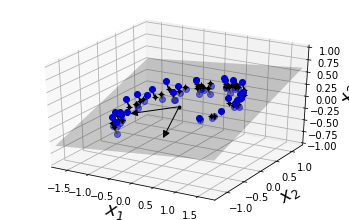

In [54]:
# plotting the 3D dataset the plane and the projections on that plane

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,3.8))
ax = fig.add_subplot(111, projection='3d')

X3D_above = X[X[:,2] > X3D_inv[:,2]]
X3D_below = X[X[:,2] <= X3D_inv[:,2]]

ax.plot(X3D_below[:,0], X3D_below[:,1], X3D_below[:,2],"bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(X, axis=0)
ax.add_artist(Arrow3D([0,C[0,0]], [0,C[0,1]],[0,C[0,2]], mutation_scale=15, lw =1, arrowstyle="-|>", color="k" ))
ax.add_artist(Arrow3D([0,C[1,0]], [0,C[1,1]],[0,C[1,2]], mutation_scale=15, lw=1, arrowstyle="-|>",color="k"))
ax.plot([0], [0], [0],"k.")

for i in range(m):
    if X[i,2] > X3D_inv[i,2]:
        ax.plot([X[i][0], X3D_inv[i][0]], [X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-")
    else :
        ax.plot([X[i][0], X3D_inv[i][0]],[X[i][1], X3D_inv[i][1]], [X[i][2], X3D_inv[i][2]], "k-", color="#505050" )

ax.plot(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2], "k+")
ax.plot(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2], "k.")
ax.plot(X3D_above[:,0], X3D_above[:,1], X3D_above[:,2], "bo")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()


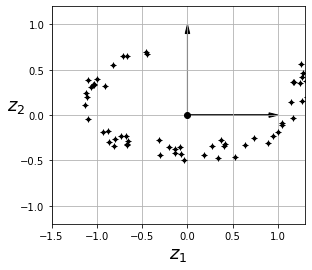

In [55]:
# plotting it on a flat projection

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(X2D[:,0], X2D[:,1], "k+")
ax.plot(X2D[:,0], X2D[:,1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0,0,0,1,head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k' )
ax.arrow(0,0,1,0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5,1.3,-1.2,1.2])
ax.grid(True)
plt.show()

### Manifold learning

In [56]:
# swiss roll

from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

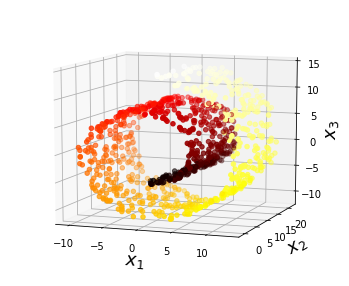

In [57]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

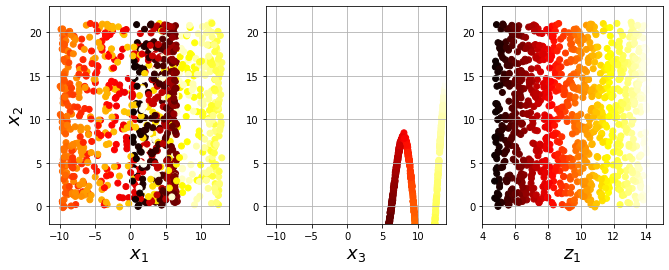

In [58]:
plt.figure(figsize=(11,4))

#plotting on two dimesnion
plt.subplot(131)
plt.scatter(X[:,0], X[:,1], c=t,cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18)
plt.grid(True)

# plotting one axis
plt.subplot(132)
plt.scatter(t,X[:,2], c=t,cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_3$", fontsize=18)
plt.grid(True)

#plotting z axis
plt.subplot(133)
plt.scatter(t,X[:,1],c=t, cmap=plt.cm.hot)
plt.axis([4,15,axes[2],axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

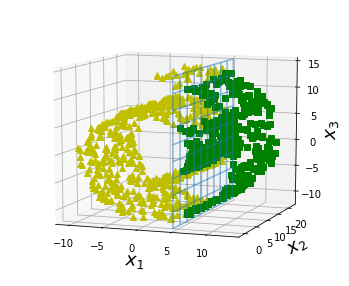

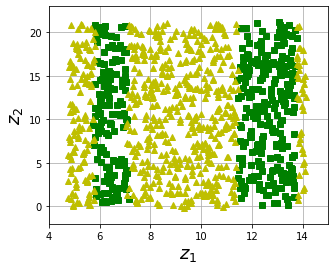

In [59]:
# manifold decision boundary plot 
# on z1 and z2

from matplotlib import gridspec

axes = [-11.5,14,-2,23,-12,15]

x2s = np.linspace(axes[2], axes[3],10)
x3s = np.linspace(axes[4], axes[5],10)
x2,x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6,5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:,0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]

ax.view_init(10, -70)
ax.plot(X_neg[:,0], X_neg[:,1],X_neg[:,2], "y^")
ax.plot_wireframe(5,x2,x3,alpha=0.5)
ax.plot(X_pos[:,0], X_pos[:,1], X_pos[:,2],"gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(5,4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class,1], "y^")
plt.axis([4,15,axes[2], axes[3]])
plt.xlabel("$z_1$",fontsize=18)
plt.ylabel("$z_2$",fontsize=18)
plt.grid(True)

plt.show()


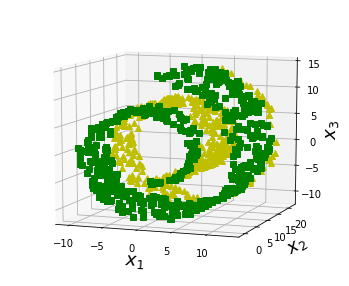

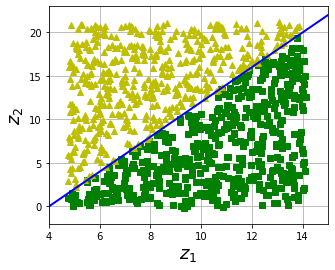

In [60]:
# how the placement of coordinate affects
# the ease of choosing a projection plane to seperate points

fig = plt.figure(figsize=(6,5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:,1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10,-70)
ax.plot(X_neg[:,0],X_neg[:,1], X_neg[:,2], "y^")
ax.plot(X_pos[:,0],X_pos[:,1], X_pos[:,2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

fig = plt.figure(figsize=(5,4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class,1],"gs")
plt.plot(t[~positive_class], X[~positive_class,1],"y^")
plt.plot([4,15], [0,22], "b-", linewidth=2)
plt.axis([4,15,axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.grid(True)

plt.show()

### PCA

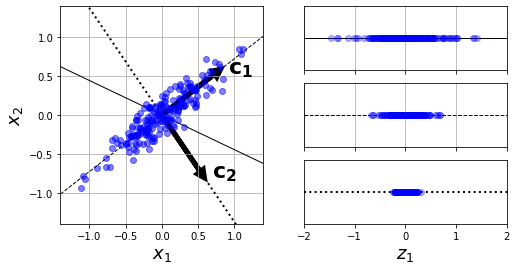

In [61]:
# for getting best pca configuration

angle = np.pi / 5
stretch = 5
m =200

np.random.seed(3)
X = np.random.randn(m,2)/10
X = X.dot(np.array([[stretch,0],[0,1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2* np.pi/6), np.sin(angle-2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1,1))
X_proj2 = X.dot(u2.reshape(-1,1))
X_proj3 = X.dot(u3.reshape(-1,1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0,0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k-", linewidth=1)
plt.plot([-1.4,1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:",linewidth=2)
plt.plot(X[:,0], X[:,1],"bo", alpha=0.5)
plt.axis([-1.4,1.4,-1.4,1.4])
plt.arrow(0,0,u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0,0,u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] +0.1, u1[1] -0.05, r"$\mathbf{c_1}$",fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$x_2$", fontsize=18)
plt.grid(True)

plt.subplot2grid((3,2),(0,1))
plt.plot([-2,2],[0,0],"k-", linewidth=1)
plt.plot(X_proj1[:,0],np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2,2,-1,1])
plt.grid(True)

plt.subplot2grid((3,2), (1,1))
plt.plot([-2,2], [0,0],"k--", linewidth=1)
plt.plot(X_proj2[:,0],np.zeros(m), "bo",alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2,2,-1,1])
plt.grid(True)

plt.subplot2grid((3,2), (2,1))
plt.plot([-2,2],[0,0], "k:", linewidth=2)
plt.plot(X_proj3[:,0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2,2,-1,1])
plt.xlabel("$z_1$", fontsize=18)

plt.show()

### MNIST Compression

In [62]:
from six.moves import urllib

from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.target = mnist.target.astype(np.int64)


In [63]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [64]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [65]:
d

154

In [66]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [67]:
pca.n_components_

154

In [68]:
np.sum(pca.explained_variance_ratio_)

0.9504334914295706

In [69]:
pca = PCA (n_components =154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [70]:
import matplotlib as mpl

def plot_digits(instances,images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances)-1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size,size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages,axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

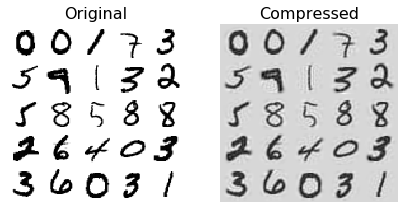

In [71]:
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

In [72]:
X_reduced_pca = X_reduced

### Incremental PCA

In [76]:
# splitting MNIST into 100 mini batches (using NumPy's array_split() function)
# and feeds them to scikit learn's IncrementalPCA class to reduce the 
# dimensionality of MNIST dataset down to 154 dimensions.
# we call the partial_fit() method with every iteraton.

from sklearn.decomposition import IncrementalPCA

n_batches =100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_mnist_reduced = inc_pca.transform(X_train)


In [77]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

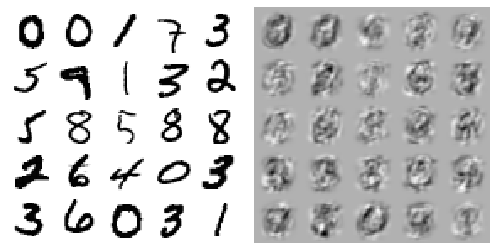

In [79]:
plt.figure(figsize=(7,4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [80]:
X_reduced_inc_pca = X_reduced

In [81]:
# comparing regular PCA and incremental PCA
np.allclose(pca.mean_, inc_pca.mean_)

True

In [82]:
np.allclose(X_reduced_pca, X_reduced_inc_pca)

True

In [84]:
# we can also use memmap class which allows you to manipulate large array stored in a binary file as if 
# it were in the memory , the calss load only the required data

filename = "my_mnist.data"
m,n = X_train.shape

X_mm = np.memmap(filename, dtype="float32", mode="write", shape=(m,n))
X_mm[:] = X_train



In [85]:
# deleting memap data will be stored to disk
# after python calls finalizer

del X_mm

In [87]:
# and then another program will use it for training
X_mm = np.memmap(filename, dtype='float32', mode='readonly', shape=(m,n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)


IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

### Randomised PCA

In [88]:
# Scikit learn offers yet another option to perform PCA called Randomised PCA.
# it a stochastic algorithm and finds an approximation of first d principlal components
# computational complexity being O (m x d^2) + O(d^2) so
#it is faster when d is much smaller than n

rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)


In [89]:
X_reduced_rnd = X_reduced

### Time complexity

In [91]:
# comparing regulat , incremental and Randomised PCA  
# for various number of principle components

import time

for n_components in (2, 10, 154):
    print("n_components= ", n_components)
    regular_pca = PCA(n_components=n_components)
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")
    
    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print(" {}: {:.1f} seconds".format(pca.__class__.__name__, t2 - t1))

n_components=  2
 PCA: 1.2 seconds
 IncrementalPCA: 6.8 seconds
 PCA: 1.2 seconds
n_components=  10
 PCA: 1.3 seconds
 IncrementalPCA: 8.0 seconds
 PCA: 1.4 seconds
n_components=  154
 PCA: 3.5 seconds
 IncrementalPCA: 9.8 seconds
 PCA: 3.5 seconds


Text(0.5, 1.0, 'PCA and randomised PCA time complexity')

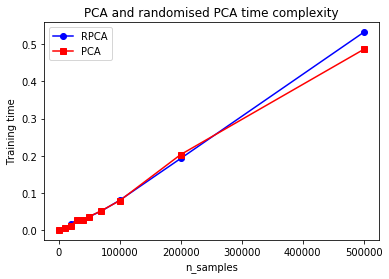

In [94]:
# comparing PCA and Randomised PCA for datasets of different sizes

times_rpca = []
times_pca = []

sizes = [1000,10000,20000,30000,40000,50000,70000,100000,200000,500000]
for n_samples in sizes:
    X = np.random.randn(n_samples,5)
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 -t1)
    pca = PCA(n_components =2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 -t1)

plt.plot(sizes, times_rpca,"b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend()
plt.title("PCA and randomised PCA time complexity")

Text(0.5, 1.0, 'timecoplexity on features')

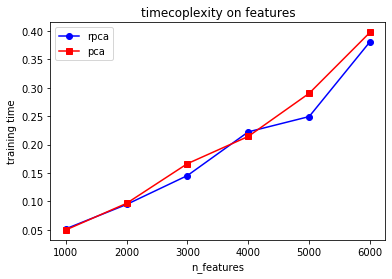

In [97]:
# comparing their performance on datasets of 2000 compneents and various features
times_rpca = []
times_pca = []
sizes = [1000,2000,3000,4000,5000,6000]

for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42,svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2-t1)
    pca = PCA(n_components=2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2-t1)

plt.plot(sizes, times_rpca, "b-o", label="rpca")
plt.plot(sizes, times_pca, "r-s", label="pca")
plt.xlabel("n_features")
plt.ylabel("training time")
plt.legend()
plt.title("timecoplexity on features")

### Kernal lPCA

In [99]:
# applying kPCA on swiss roll

X,t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


In [101]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components =2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

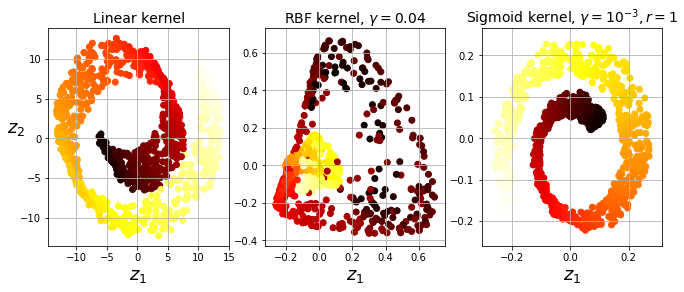

In [108]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

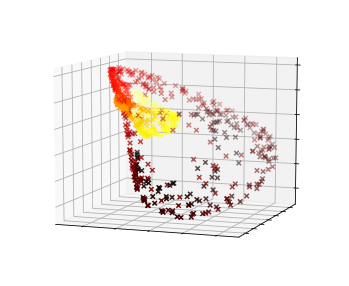

In [109]:
# mapping inverse function
# "reduced space"

plt.figure(figsize=(6,5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10,-70)
ax.scatter(X_inverse[:,0], X_inverse[:,1], X_inverse[:,2],c=t, cmap=plt.cm.hot,marker="x" )
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

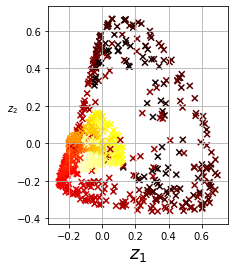

In [110]:
# map of forward transform
# "reconstruction pre-image"

X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11,4))
plt.subplot(132)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap=plt.cm.hot,marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", rotation=0)
plt.grid(True)

In [112]:
## using gridsearch cv to fin best parameters 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression(solver="liblinear"))
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                 

In [113]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


In [114]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, 
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [115]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

# since kernel PCA is unsupervised there are not many hyper parameteres
# to control
# so we use  something like preimage which reconstructs
# image close to original space 
# this can be used as a feedback

32.786308795766125

### Locally Linear Embedding (LLE)

In [119]:
# using it on swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

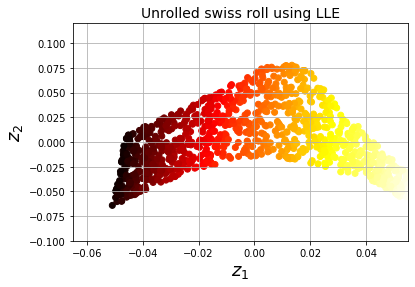

In [121]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

# unrolling squishes the right end while the left end is more

### MDS,Isomap and t-SNE

In [122]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)


In [123]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

In [124]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

In [125]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

C:\installs\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


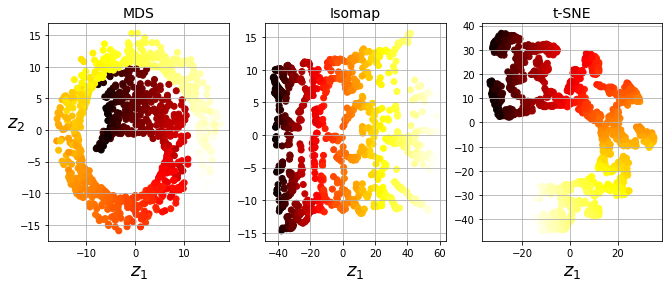

In [127]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131,132,133), titles, (X_reduced_mds,X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:,0], X_reduced[:,1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if(subplot==131):
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
        
plt.show()

In [128]:
def learned_parameters(model):
    return [m for m in dir(model) if m.endswith("_") and not m.startswith("_")]